Walk trees part 2: hydrasnake
----------
- Author: [Timothy Hobbs](https://timothy.hobbs.cz)
- License: [CC-BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)
- Written: 3.2020
- Send PRs to: [github](https://github.com/timthelion/rust-jupyter)

[project homepage](https://github.com/timthelion/petgraph-hydrasnake) [ipynb](./walk-trees-part2-hydrasnake.ipynb)

Walk trees are a novel graph traversal algorithm designed for selecting regions of graphs.

In the previous selection I described zzstructures. Now I'm going to take a diversion and describe the hydrasnake graph traversal algorithm.

The Hydrasnake algorithm
-----------------------

Before we continue I'd like to talk about the hydrasnake algorithm. The hydra is a mythological being which regrows two heads when you cut off one [1]. Snake is a videogame in which a snake grows longer each time it eats an apple. It ends when the snake grows so long that it inevitably runs into itself. A hydrasnake is a snake which travels along a graph growing longer with each new vertex. Each time it comes across a vertex with two or more outgoing edges, it grows new heads for each new outgoing edge. A head dies, or is completed, when it touches a part of it's body which is above that particular head. Imagine we have a tree:

[1] According to some accounts

In [3]:
:dep petgraph-examples = {path="./petgraph-examples"}

In [4]:
:dep petgraph = {path="./petgraph"}

In [5]:
:dep petgraph-overlay = {path="./petgraph-overlay"}

In [6]:
:dep petgraph-evcxr = {path="./petgraph-evcxr"}

In [7]:
use std::collections::HashMap;
use petgraph::*;
use petgraph::graph::*;
use petgraph::data::*;
use petgraph_overlay::*;
use petgraph_evcxr::*;
use petgraph_examples::*;

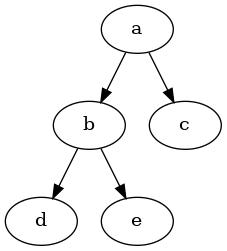

In [8]:
{
    draw_graph(&tree());
}

And we plant a hydrasnake at vertex `a`.

Since there are two edges comming out of vertex `a`, the hydrasnake will grow two heads, one at vertex `b` and one at vertex `c`. There's nowhere for the head at vertex `c` to go, so it will stay put. Since there are two edges from vertex `b`, the head at vertex `b` will split and two new heads will appear, one at vertex `d` and one at vertex `e`. When placed at the root of a directed tree, the hydrasnake algorithm will cover the entire tree. When placed "above" the root, however, the hydrasnake will only climb "upwards" [2].

So if we plant a hydrasnake at vertex `b` it will grow to cover `d` and `e` but not `a` and `c`.

Imagine we have a dag.

[2] I know, our tree is upside down. Welcome to math.

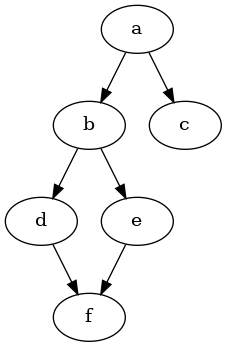

In [9]:
{
    draw_graph(&dag());
}

If we plant a hydrasnake at `a` it will split and go on to `b` and `c`, from `b` it will split and go to `d` and `e`. 